## source: https://www.datacamp.com/community/tutorials/recommender-systems-python

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
#from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from collections import Counter
import sqlite3

In [2]:
# Load the data
file_path = 'books.csv'
df = pd.read_csv(file_path, error_bad_lines = False)
df.head()

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


## creating dummy data for additional features. using random number generator.

In [3]:
# create a random column for genre
df['randNumCol'] = np.random.randint(0,5, size=len(df))

In [4]:
# create a random column for gender
df['randNumCol2'] = np.random.randint(0,2, size=len(df))


In [5]:
# create a random column for age
df['randNumCol3'] = np.random.randint(18,80, size=len(df))


In [6]:
df.head(20)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,randNumCol,randNumCol2,randNumCol3
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,4,0,75
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,1,0,70
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,0,1,37
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,4,1,55
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,4,1,24
5,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,en-US,152,19,1,4/26/2005,Nimble Books,2,0,37
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic,3,1,57
7,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3628,254,11/1/2005,Gramercy Books,0,0,23
8,13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,0345453743,9780345453747,eng,815,249558,4080,4/30/2002,Del Rey Books,2,1,53
9,14,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,1400052920,9781400052929,eng,215,4930,460,8/3/2004,Crown,2,0,18


## replacing the random intergers with values and changing column names

In [7]:
## replace column name with gender
df["randNumCol2"].replace({0: "M", 1: "F"}, inplace=True)


In [8]:
## replace randnumcol with genre
df["randNumCol"].replace({0: "Adventure", 1: "Non-Fiction", 2:"Thriller", 3:"Romance", 4: "Fiction", 5:"Sci-Fi"}, inplace=True)

In [9]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,randNumCol,randNumCol2,randNumCol3
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,Fiction,M,75
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,Non-Fiction,M,70
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,Adventure,F,37
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,Fiction,F,55
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,Fiction,F,24


In [10]:
## change column name of random number to genre column
df.rename(columns = {'randNumCol' : 'genre', 'randNumCol2': 'most_votes_by_gender', 'randNumCol3': 'average_age'}, inplace = True)
df.head()


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genre,most_votes_by_gender,average_age
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,Fiction,M,75
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,Non-Fiction,M,70
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,Adventure,F,37
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,Fiction,F,55
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,Fiction,F,24


In [11]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count,average_age
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099,48.227097
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589,17.882789
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000,18.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000,33.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000,48.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000,64.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000,79.000000


## export to csv to try to import to tableau for visualizations?

In [12]:
## read df to csv file to import into tableau
df.to_csv('books_added_features.csv')

## maybe we can visualize these total counts in a chart?
### total books for each genre, avg rating for each genre, total books for each gender, total books for each age group, etc.

In [13]:
#  1. Get the total books for each genre

genre_count = df.groupby(["genre"]).count()["bookID"]
genre_count

genre
Adventure      2276
Fiction        2204
Non-Fiction    2242
Romance        2171
Thriller       2230
Name: bookID, dtype: int64

In [14]:
## Get avg rating for each genre

genre_total_avg_rating = df.groupby(["genre"]).sum()["average_rating"]
genre_total_avg_rating

genre
Adventure      8971.70
Fiction        8648.55
Non-Fiction    8811.95
Romance        8547.73
Thriller       8778.79
Name: average_rating, dtype: float64

In [15]:
## Get the total books for each gender

gender_count = df.groupby(["most_votes_by_gender"]).count()["bookID"]
gender_count

most_votes_by_gender
F    5468
M    5655
Name: bookID, dtype: int64

In [16]:
## create age bins by bookID
bins = [0, 20, 40, 60, 80]
labels = ["young adult", "adult", "old adult", "elderly"]
df['age_groups'] = pd.cut(df['average_age'], bins, labels=labels)
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genre,most_votes_by_gender,average_age,age_groups
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,Fiction,M,75,elderly
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,Non-Fiction,M,70,elderly
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,Adventure,F,37,adult
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,Fiction,F,55,old adult
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,Fiction,F,24,adult


In [17]:
## Get the total books for each age group

age_group_count = df.groupby(["age_groups"]).count()["bookID"]
age_group_count

age_groups
young adult     536
adult          3664
old adult      3591
elderly        3332
Name: bookID, dtype: int64

### i tried to do visualizations here, but forgot how to use matplotlib :/

<BarContainer object of 5 artists>

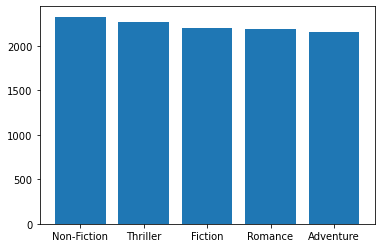

In [18]:
import matplotlib.pyplot as plt

# Set the x-axis to a list of strings for each month.
x_axis = ["Non-Fiction", "Thriller", "Fiction", "Romance", "Adventure"]

# Set the y-axis to a list of floats as the total fare in US dollars accumulated for each month.
y_axis = [2326, 2263, 2196, 2185, 2155]

# Create the plot
plt.bar(x_axis, y_axis)

In [19]:
df.dtypes

bookID                     int64
title                     object
authors                   object
average_rating           float64
isbn                      object
isbn13                     int64
language_code             object
  num_pages                int64
ratings_count              int64
text_reviews_count         int64
publication_date          object
publisher                 object
genre                     object
most_votes_by_gender      object
average_age                int64
age_groups              category
dtype: object

## creating a new df to only show the features we are working with

In [20]:
## create new df2 with book title, average_rating, ratings_count, genre, most_votes_by_gender, average_age, age groups
df2 = df[['title', 'average_rating', 'ratings_count', 'genre', 'most_votes_by_gender', 'average_age', 'age_groups']]
df2.head()

,title,average_rating,ratings_count,genre,most_votes_by_gender,average_age,age_groups
0,Harry Potter and the Half-Blood Prince (Harry ...,4.57,2095690,Fiction,M,75,elderly
1,Harry Potter and the Order of the Phoenix (Har...,4.49,2153167,Non-Fiction,M,70,elderly
2,Harry Potter and the Chamber of Secrets (Harry...,4.42,6333,Adventure,F,37,adult
3,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,2339585,Fiction,F,55,old adult
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,41428,Fiction,F,24,adult


## weighted average

In [21]:
## Only want books with at least 80% of the average number of ratings
df2 = df2.loc[df2['ratings_count'] >= 17942.85*.8]
## Sorting remaing books by average rating
df2 = df2.sort_values(by = 'average_rating', ascending = False)
df2.head(10)

,title,average_rating,ratings_count,genre,most_votes_by_gender,average_age,age_groups
6587,The Complete Calvin and Hobbes,4.82,32213,Thriller,M,33,adult
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,41428,Fiction,F,24,adult
6589,It's a Magical World (Calvin and Hobbes #11),4.76,23875,Non-Fiction,M,73,elderly
6,Harry Potter Collection (Harry Potter #1-6),4.73,28242,Romance,F,57,old adult
6590,Homicidal Psycho Jungle Cat (Calvin and Hobbes...,4.72,15365,Thriller,M,56,old adult
6591,The Days Are Just Packed,4.69,20308,Fiction,M,44,old adult
6294,The Absolute Sandman Volume One,4.65,15640,Non-Fiction,F,68,elderly
6588,The Calvin and Hobbes Tenth Anniversary Book,4.63,49122,Non-Fiction,F,53,old adult
21,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,4.59,101233,Fiction,M,76,elderly
72,The Lord of the Rings: The Art of the Fellowsh...,4.59,26153,Adventure,F,19,young adult


## popularity based recommendation system using weighted rating

In [22]:
##Starting to make the rec system

v = df2["ratings_count"]
R = df2["average_rating"]
m = 17942.85*.8
C = 3.934075

#Weighted Average
df2["weighted values"] = v/(v+m)*R + (m/(v+m))*C
df2.head()

,title,average_rating,ratings_count,genre,most_votes_by_gender,average_age,age_groups,weighted values
6587,The Complete Calvin and Hobbes,4.82,32213,Thriller,M,33,adult,4.546915
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,41428,Fiction,F,24,adult,4.562321
6589,It's a Magical World (Calvin and Hobbes #11),4.76,23875,Non-Fiction,M,73,elderly,4.449883
6,Harry Potter Collection (Harry Potter #1-6),4.73,28242,Romance,F,57,old adult,4.461786
6590,Homicidal Psycho Jungle Cat (Calvin and Hobbes...,4.72,15365,Thriller,M,56,old adult,4.340402


In [23]:
df2 = df2.sort_values(by='weighted values',ascending=False)
df2.head(25)

,title,average_rating,ratings_count,genre,most_votes_by_gender,average_age,age_groups,weighted values
0,Harry Potter and the Half-Blood Prince (Harry ...,4.57,2095690,Fiction,M,75,elderly,4.565674
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,41428,Fiction,F,24,adult,4.562321
3,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,2339585,Fiction,F,55,old adult,4.556183
6587,The Complete Calvin and Hobbes,4.82,32213,Thriller,M,33,adult,4.546915
21,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,4.59,101233,Fiction,M,76,elderly,4.508544
1,Harry Potter and the Order of the Phoenix (Har...,4.49,2153167,Non-Fiction,M,70,elderly,4.486318
4244,The Complete Maus,4.55,111475,Non-Fiction,F,22,adult,4.479737
6588,The Calvin and Hobbes Tenth Anniversary Book,4.63,49122,Non-Fiction,F,53,old adult,4.472626
6,Harry Potter Collection (Harry Potter #1-6),4.73,28242,Romance,F,57,old adult,4.461786
6589,It's a Magical World (Calvin and Hobbes #11),4.76,23875,Non-Fiction,M,73,elderly,4.449883


## recommendation system based on features = ['genre', 'most_votes_by_gender', 'age_group']

In [24]:
## concatinating the 3 features to create a vector
def create_soup(x):
    return ' '.join(x['genre']) + ' ' + ' '.join(x['most_votes_by_gender'])+ ' '.join(x['age_groups'])

In [25]:
# Create a new soup feature
df2['soup'] = df2.apply(create_soup, axis=1)


In [26]:
df2[['soup']].head(2)

,soup
0,F i c t i o n Me l d e r l y
4,F i c t i o n Fa d u l t


In [27]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [28]:
count_matrix.shape

(1579, 6)

In [29]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)


In [30]:
# Reset index of your main DataFrame and construct reverse mapping as before
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])


In [31]:
# Function that takes in book title as input and outputs most similar books
def get_recommendations(title, cosine_sim2=cosine_sim2):
    # Get the index of the book that matches the title
    idx = indices[title]

    # Get the pairwise similarity scores of all books with that book
    sim_scores = list(enumerate(cosine_sim2[idx]))

    # Sort the books based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    book_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar book
    return df2['title'].iloc[book_indices]

In [32]:
get_recommendations('The Green Mile', cosine_sim2)

20                             The Days Are Just Packed
24                              Voyager (Outlander  #3)
28                          The Wake (The Sandman  #10)
32    Homicidal Psycho Jungle Cat (Calvin and Hobbes...
39         Lover Eternal (Black Dagger Brotherhood  #2)
53                               The Brothers Karamazov
58                                               Exodus
70        Lover Revealed (Black Dagger Brotherhood  #4)
72           War and Remembrance (The Henry Family  #2)
76      Death Note  Vol. 2: Confluence (Death Note  #2)
Name: title, dtype: object

In [33]:
get_recommendations('The Complete Maus', cosine_sim2)

6                                      The Complete Maus
21     The Complete Anne of Green Gables Boxed Set (A...
34                                      The Kissing Hand
49                                               Matilda
60               The Power of One (The Power of One  #1)
69       Howl's Moving Castle (Howl's Moving Castle  #1)
83       Anne of Green Gables (Anne of Green Gables  #1)
103            Lioness Rampant (Song of the Lioness  #4)
111                                  The Prince of Tides
118                            Remember (Redemption  #2)
Name: title, dtype: object

## user can type book title and get recommendation based on similar books

In [ ]:
print('Enter book title:')
x = input()
print(get_recommendations(x , cosine_sim2))

Enter book title:
